# Part One - Prosper Loan Data Exploration
## by Alex Kakai

## Introduction
> This data set contains loans data from Prosper, an America marketplace lending platform, with more 9 billion dollars in disbursed loans. The dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit  history, latest payment information and many others.
The main purposes of this project are to summarize the characteristics of  variables that can affect the disbursement loan and repayment and to get some ideas about the  relationships among multiple variables using summary statistics and data  visualizations.

## Preliminary Wrangling


In [38]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # default='warn'

base_color = sns.color_palette()[0]

In [39]:
#Loading the dataset
prosperLoanData = pd.read_csv(r"E:\New folder\dataverse_files\prosperLoanData.csv")
prosperLoanData.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [40]:
#Checking the shape,info and descriptive statictics
print(prosperLoanData.shape)
print(prosperLoanData.info())
prosperLoanData.describe()

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### A number of issues/descipencies noticed in the dataset:
> Date columns are have object/string datatype

> Some columns have a number of missing data, more than 10% of the whole dataset is missing

> Presence of duplicate rows of data



In [41]:
#Changing date columns to object to datetime
#date_cols = [col for col in prosperLoanData.columns if 'Date' in col]
date_cols = []
for col in prosperLoanData.columns:
    if 'Date' in col:
        date_cols.append(col)

prosperLoanData[date_cols] = prosperLoanData[date_cols].apply(pd.to_datetime, errors='coerce')
prosperLoanData[date_cols].dtypes

ListingCreationDate    datetime64[ns]
ClosedDate             datetime64[ns]
DateCreditPulled       datetime64[ns]
LoanOriginationDate    datetime64[ns]
dtype: object

In [42]:
#Check for missing values/data
prosperLoanData.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [43]:
#Dropping columns that have more than 10% of row with missing data
cols = [c for (c, v) in prosperLoanData.isnull().sum().iteritems() if v > prosperLoanData.shape[0]*0.1]
prosperLoanData.drop(columns = cols, inplace = True)
prosperLoanData.shape

(113937, 63)

In [44]:
#displaying rows with missing data
prosperLoanData.isnull().sum()

ListingKey                     0
ListingNumber                  0
ListingCreationDate            0
Term                           0
LoanStatus                     0
                              ..
PercentFunded                  0
Recommendations                0
InvestmentFromFriendsCount     0
InvestmentFromFriendsAmount    0
Investors                      0
Length: 63, dtype: int64

In [45]:
#Check for duplicates
prosperLoanData.ListingKey.duplicated().sum()

871

In [46]:
#Dropping of duplicates
prosperLoanData.drop_duplicates(subset =['ListingKey'], keep = 'first', inplace = True)
prosperLoanData.ListingKey.duplicated().sum()

0

In [47]:
#dropping all rows with missing data
prosperLoanData.dropna(inplace=True)
prosperLoanData.shape

(94113, 63)

> During cleaning, a number of columns and rows were dropped due to missing data and duplicates. From 113937 rows and 81 columns, the dataset remained with 94113 rows with 63 columns which were used for analysis

### What is the structure of dataset?

> Dataset contains 113,937 loans rows with 81 variables/columns

> However, after cleaning and dropping of some columns due to having missing data in more than 10% of the total number of rows, 94113 rows with 63 columns remained

### What are the main features of interest?

> Interest Rates Distribution

> Repayment Behavior

> Loan Size Distribution

> Credit Score Checks


### What features in the dataset do you think will help support your investigation into your features of interest?

> **Interest Rates**: BorrowerAPR, BorrowerRate, LenderYield

> **Repayment Behavior**: MonthlyLoanPayment,IncomeRange, StatedMonthlyIncome, IsBorrowerHomeowner, EmploymentStatus, LoanStatus

> **Loan Size**: LoanOriginalAmount

> **Credit Score Checks**: CreditScoreRangeLower, CreditScoreRangeUpper


### Here are some of the questions that I will be going to investigate:

> How does Credit Score affect Loan amount to be given out?

> Does customer's monthly income/income range/employemnt status/month bracketincome affect their repayment behavior?

> Does customer's monthly income/income range/employemnt status/month bracketincome affect loan amount to be disbursed/?

> Does home ownership/occupation affect the amount that is given to a customer?

> Does loan repayment length affect the repayment behavior? 

> Does monthly install amount affect the repayment behavior?

> What factors affect a loan’s outcome status?

> What affects the borrower’s APR or interest rate?

> Are there differences between loans depending on how large the original loan amount was?


## Univariate Exploration

### How are the interest rates (BorrowerAPR,BorrowerRate, LenderYield) distributed?

In [48]:
col = ['BorrowerAPR','BorrowerRate','LenderYield']
display(prosperLoanData[col].describe())

,BorrowerAPR,BorrowerRate,LenderYield
count,94113.000000,94113.000000,94113.000000
mean,0.218335,0.191241,0.181160
std,0.080543,0.074919,0.074689
min,0.006530,0.000000,-0.010000
25%,0.155380,0.131400,0.121400
50%,0.208080,0.180000,0.170000
75%,0.283240,0.249900,0.239800
max,0.423950,0.360000,0.340000


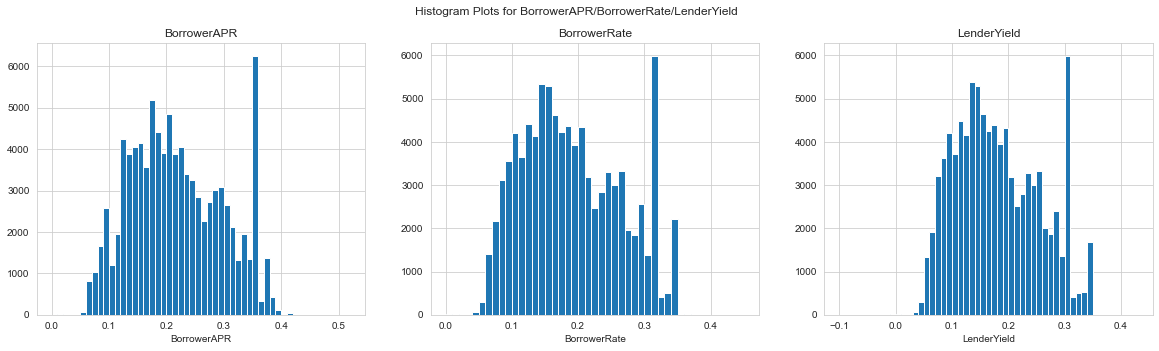

In [49]:
prosperLoanData.BorrowerAPR.describe()
plt.figure(figsize = [20,5])
plt.subplot(1,3,1)
bins = np.arange(0, prosperLoanData['BorrowerAPR'].max()+0.1, 0.01)
plt.hist(data = prosperLoanData, x = 'BorrowerAPR', bins = bins)
plt.xlabel('BorrowerAPR')
plt.title('BorrowerAPR')
plt.subplot(1,3,2)
bins = np.arange(0, prosperLoanData['BorrowerRate'].max()+0.1, 0.01)
plt.hist(data = prosperLoanData, x = 'BorrowerRate', bins = bins)
plt.xlabel('BorrowerRate')
plt.title('BorrowerRate')
plt.subplot(1,3,3)
bins = np.arange(-0.1, prosperLoanData['LenderYield'].max()+0.1, 0.01)
plt.hist(data = prosperLoanData, x = 'LenderYield', bins = bins)
plt.xlabel('LenderYield')
plt.title('LenderYield')
plt.suptitle('Histogram Plots for BorrowerAPR/BorrowerRate/LenderYield');

> All the three interest rate fields have a spike between 30% and 40%. Also we observe that the three fields are multimodal distributed with more than two peaks

### How are the Loan Original Amounts and Monthly Loan Payment distributed?

In [50]:
col = ['LoanOriginalAmount','MonthlyLoanPayment']
display(prosperLoanData[col].describe())

,LoanOriginalAmount,MonthlyLoanPayment
count,94113.000000,94113.000000
mean,8725.055784,282.221616
std,6371.430898,194.116173
min,1000.000000,0.000000
25%,4000.000000,140.230000
50%,7000.000000,233.710000
75%,12904.000000,380.560000
max,35000.000000,2251.510000


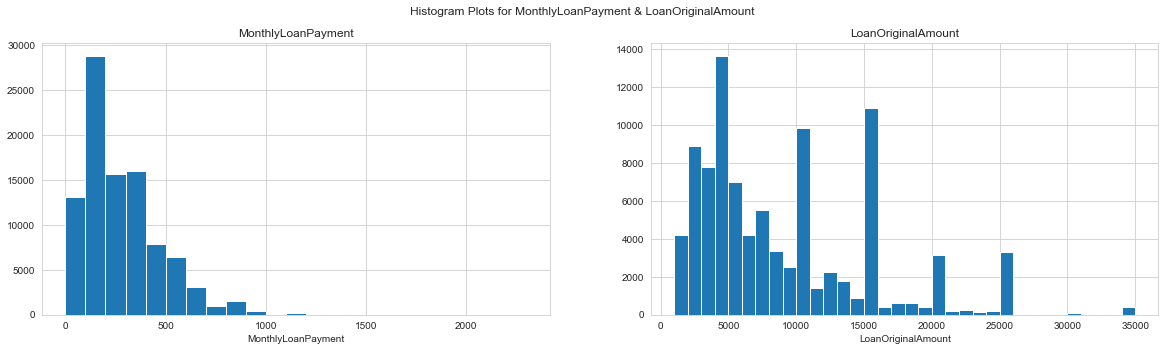

In [51]:
plt.figure(figsize = [20,5])
plt.subplot(1,2,1)
bins = np.arange(0, prosperLoanData['MonthlyLoanPayment'].max()+100, 100)
plt.hist(data = prosperLoanData, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('MonthlyLoanPayment')
plt.title('MonthlyLoanPayment')
plt.subplot(1,2,2)
bins = np.arange(1000, prosperLoanData['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = prosperLoanData, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount')
plt.title('LoanOriginalAmount')
plt.suptitle('Histogram Plots for MonthlyLoanPayment & LoanOriginalAmount');

> Monthly Loan Payment is skewwed to the right, showing possible presence of outliers in the data. Likewise, the Loan Original Amount is Multimodal distributed with several spikes but also with right skewwed showing possible presence of outliers.

In [52]:
#Calculating the interquartile range for both the LoanOriginalAmount & MonthlyLoanPayment
prosperLoanData_iqr = prosperLoanData[['LoanOriginalAmount','MonthlyLoanPayment']]
Q1 =prosperLoanData_iqr.quantile(0.25)
Q3 = prosperLoanData_iqr.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

LoanOriginalAmount    8904.00
MonthlyLoanPayment     240.33
dtype: float64


In [53]:
#Dropping rows which are above and below the interquartile range + 1.5
prosperLoanData_iqr_clean = prosperLoanData_iqr[~((prosperLoanData_iqr < (Q1 - 1.5 * IQR)) | (prosperLoanData_iqr > (Q3 + 1.5 * IQR))).any(axis=1)]
prosperLoanData_iqr_clean.shape

(91139, 2)

In [54]:
#Merging the transformed columns back to the main dataset
prosperLoanData[['LoanOriginalAmount','MonthlyLoanPayment']] = prosperLoanData_iqr_clean

### How are the other variables of interest distributed?
> Term, EmploymentStatus, LoanStatus, IncomeRange, IsBorrowerHomeowner, ListingCategory (numeric)

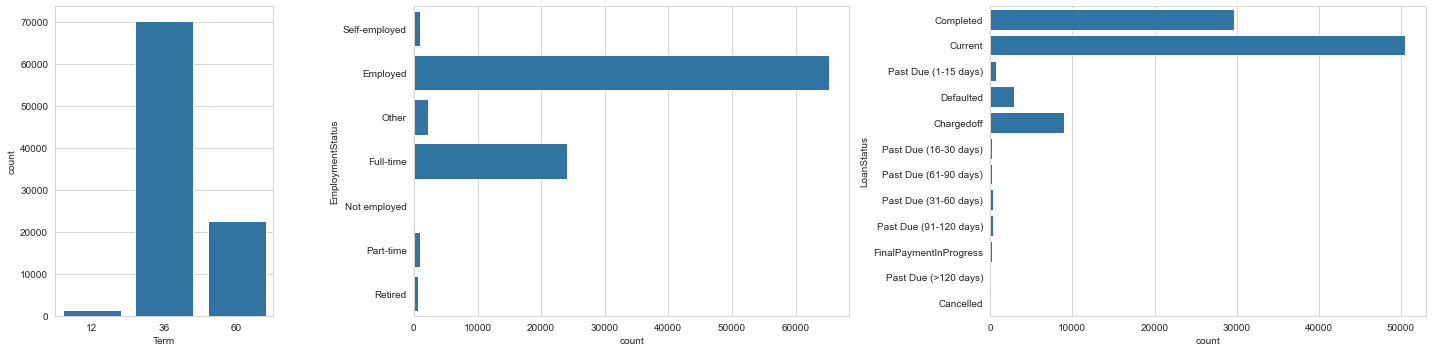

In [55]:
plt.figure(figsize = [20,5])
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 2, 2])
ax0 = plt.subplot(gs[0])
sns.countplot(data=prosperLoanData, x = 'Term', color=base_color)
ax1 = plt.subplot(gs[1])
sns.countplot(data=prosperLoanData, y = 'EmploymentStatus', color=base_color)
ax2 = plt.subplot(gs[2])
sns.countplot(data=prosperLoanData, y = 'LoanStatus', color=base_color)
plt.tight_layout();

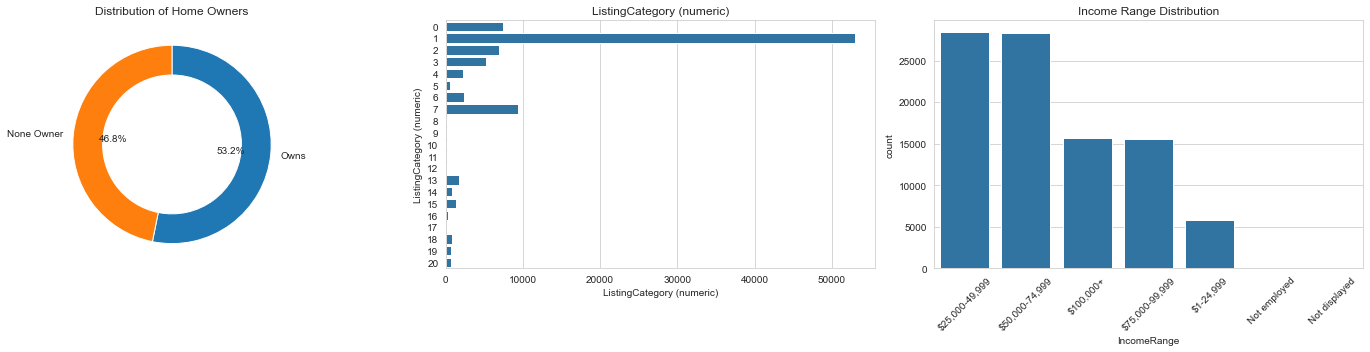

In [56]:
plt.figure(figsize = [20,5])
plt.subplot(1,3,1)
sns.set_style("whitegrid")
sorted_counts = prosperLoanData.IsBorrowerHomeowner.value_counts()
plt.pie(sorted_counts, startangle = 90, counterclock = False,wedgeprops = {'width' : 0.3},labels = ['Owns', 'None Owner'], autopct='%1.1f%%')
plt.title('Distribution of Home Owners')
plt.subplot(1,3,2)
sns.countplot(data = prosperLoanData, y = 'ListingCategory (numeric)',  color=base_color)
plt.xlabel('ListingCategory (numeric)')
plt.title('ListingCategory (numeric)')
plt.subplot(1,3,3)
sns.countplot(data = prosperLoanData, x = 'IncomeRange', color=base_color)
plt.xticks(rotation = 45)
plt.title('Income Range Distribution')
plt.tight_layout();

In [57]:
#Changing Not displayed to Not employed
prosperLoanData['IncomeRange'].replace('Not displayed', 'Not employed', inplace = True)
#Convert the "IncomeRange" column from a plain object type into an ordered categorical type
salary_classes = ['Not employed', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
sclasses = pd.api.types.CategoricalDtype(ordered=True, categories=salary_classes)
prosperLoanData['IncomeRange'] = prosperLoanData['IncomeRange'].astype(sclasses);

### Areas of Discussion:

> For the interest rates (BorrowerAPR/BorrowerRate/LenderYield), the bins had to be recalculated to be able to capture the distribution correctly. All the three variables have multimodal distribution with several spikes followed by decreases.

> Income Range variable is supposed to be a categorical variable showing increase in income amounts, from the plot the ranges were not arranged accordingly. The column was transformed to a categorical variable, showing gradual increase from unemployed customers to those earning $100000+. Also it has a small number of customers whose income is not displayed, the case are few and can be dropped or replaced with Not employed.

> Monthly Loan Payment and Original Loan Amounts are skewwed to the right implying presence of outliers in the data. Interquartile range method was applied to help transform/drop the outliers.

> Distribution of Home Owners is almost equally shared, Home Owners are slightly the majority with 53.2% while None Homers Owners are at 46.8%.

> Majority of the loans have a loan term of 36 months followed by 60 months and lastly very few are of 12 months.

> Majority of the customers disbersed to are either employed or are in full time employement.

> Majority of clients took the loans so that they can consolidate their debts, improve their homes and for business purposes.

In [58]:
#dropping all rows with missing data after transformations
prosperLoanData.dropna(inplace=True)
prosperLoanData.shape

(91139, 63)

## Bivariate Exploration

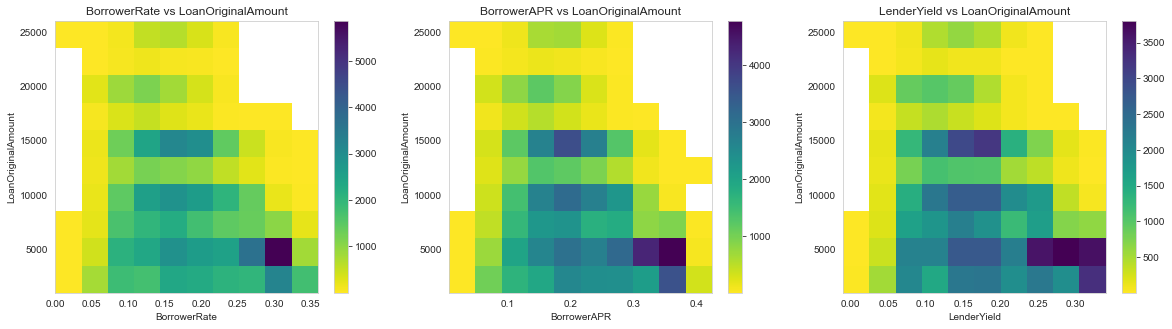

In [59]:
plt.figure(figsize = [20,5])
plt.subplot(1,3,1)
plt.hist2d(data = prosperLoanData, x = 'BorrowerRate', y = 'LoanOriginalAmount', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('BorrowerRate')
plt.ylabel('LoanOriginalAmount')
plt.title('BorrowerRate vs LoanOriginalAmount')
plt.subplot(1,3,2)
plt.hist2d(data = prosperLoanData, x = 'BorrowerAPR', y = 'LoanOriginalAmount', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('BorrowerAPR')
plt.ylabel('LoanOriginalAmount')
plt.title('BorrowerAPR vs LoanOriginalAmount')
plt.subplot(1,3,3)
plt.hist2d(data = prosperLoanData, x = 'LenderYield', y = 'LoanOriginalAmount', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('LenderYield')
plt.ylabel('LoanOriginalAmount')
plt.title('LenderYield vs LoanOriginalAmount');

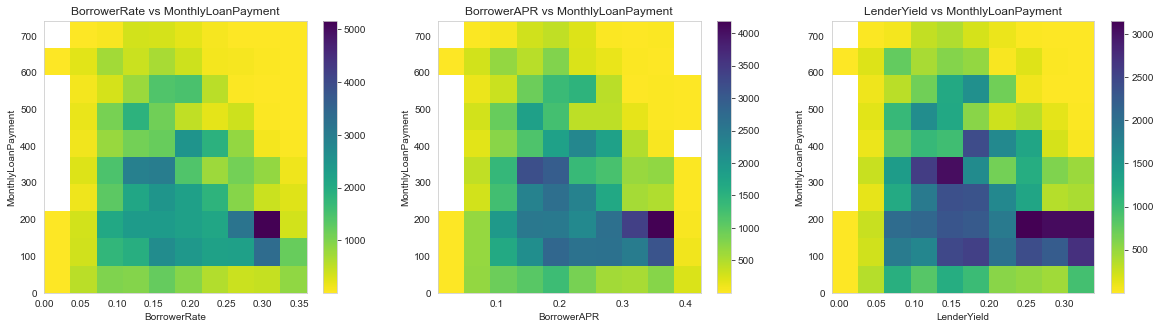

In [60]:
plt.figure(figsize = [20,5])
plt.subplot(1,3,1)
plt.hist2d(data = prosperLoanData, x = 'BorrowerRate', y = 'MonthlyLoanPayment', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('BorrowerRate')
plt.ylabel('MonthlyLoanPayment')
plt.title('BorrowerRate vs MonthlyLoanPayment')
plt.subplot(1,3,2)
plt.hist2d(data = prosperLoanData, x = 'BorrowerAPR', y = 'MonthlyLoanPayment', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('BorrowerAPR')
plt.ylabel('MonthlyLoanPayment')
plt.title('BorrowerAPR vs MonthlyLoanPayment')
plt.subplot(1,3,3)
plt.hist2d(data = prosperLoanData, x = 'LenderYield', y = 'MonthlyLoanPayment', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('LenderYield')
plt.ylabel('MonthlyLoanPayment')
plt.title('LenderYield vs MonthlyLoanPayment');

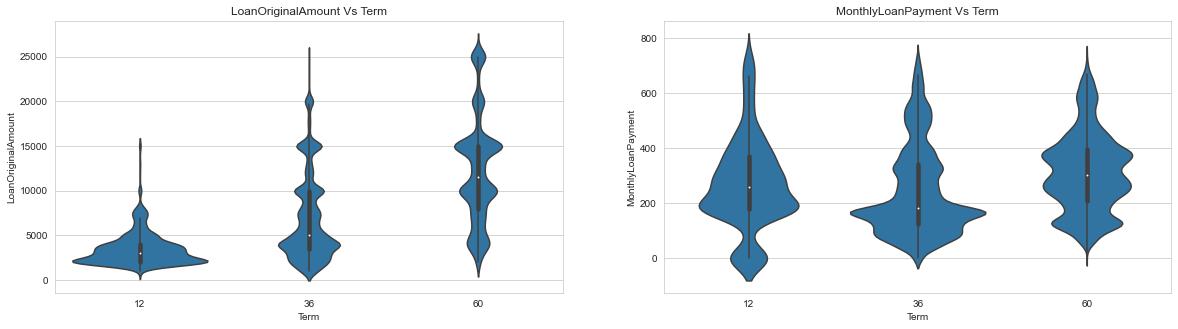

In [61]:
plt.figure(figsize = [20,5])
plt.subplot(1,2,1)
sns.violinplot(data=prosperLoanData, x='Term', y='LoanOriginalAmount', color=base_color)
plt.xlabel('Term')
plt.ylabel('LoanOriginalAmount')
plt.title('LoanOriginalAmount Vs Term')
plt.subplot(1,2,2)
sns.violinplot(data=prosperLoanData, x='Term', y='MonthlyLoanPayment', color=base_color)
plt.xlabel('Term')
plt.ylabel('MonthlyLoanPayment')
plt.title('MonthlyLoanPayment Vs Term');

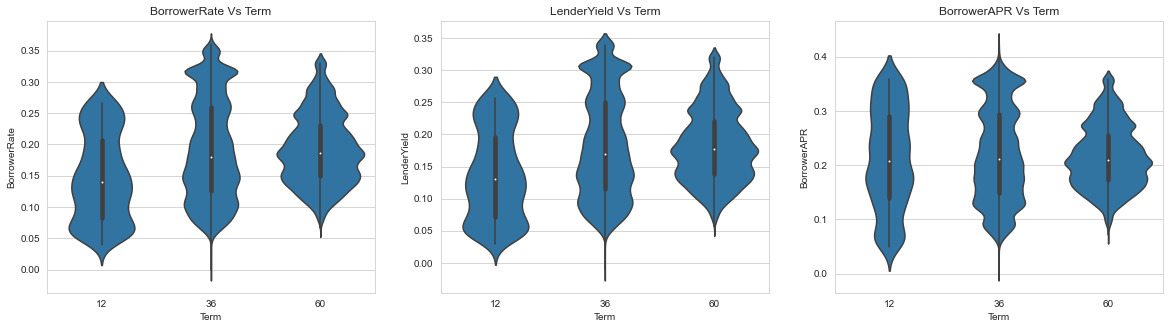

In [62]:
plt.figure(figsize = [20,5])
plt.subplot(1,3,1)
base_color = sns.color_palette()[0] 
sns.violinplot(data=prosperLoanData, x='Term', y='BorrowerRate', color=base_color)
plt.xlabel('Term')
plt.ylabel('BorrowerRate')
plt.title('BorrowerRate Vs Term')
plt.subplot(1,3,2)
sns.violinplot(data=prosperLoanData, x='Term', y='LenderYield', color=base_color)
plt.xlabel('Term')
plt.ylabel('LenderYield')
plt.title('LenderYield Vs Term')
plt.subplot(1,3,3)
sns.violinplot(data=prosperLoanData, x='Term', y='BorrowerAPR', color=base_color)
plt.xlabel('Term')
plt.ylabel('BorrowerAPR')
plt.title('BorrowerAPR Vs Term');

### Areas of Discussion

> Low Loan and monthly payments amounts are subjected to high interest rates as compared to high loan and high monthly payments amounts. From the plots majority of the loans fall in the 5000 dollars bracket while the monthly payments fall between 100 and 200 dollars, however, on the intereest rates, these two fall to right which is towards the maximum interest rate applied.

> MonthlyLoanPayment and LoanOriginalAmount have the same relationship when compared with the various interest rates variables (BorrowerRate/BorrowerAPR/LenderYield). These two variables are negatively correlated with the interest rate variables, as MonthlyLoanPayment and LoanOriginalAmount increase BorrowerRate/BorrowerAPR/LenderYield descrease.

> Relationship between LoanOriginalAmount and LoanTerm shows that loans size is directly proportinal to loan term. Smaller loan amounts have shaorter terms as compared to larger loan amounts which have longer repayment period.

> Relationship between MonthlyLoanPayment and LoanTerm shows a different picture as compared to Loan Amount, Loans with 36 months have generally a lower average monthly loan payment amount (below 200 dollars) as compared to the other two loan terms. Loans with 60 months repayment plan have the highest average monthly loan payment amount of about 300 dollars while 12 months loans is around 250 dollars

> Loan Term behaves different with the interest rates, we observe for BorrowerRate and LenderYield, there is an increase in the rates with increase in number of months. However, for BorrowerAPR, the loans have the same average of around 20% across the three loan terms.

## Multivariate Exploration

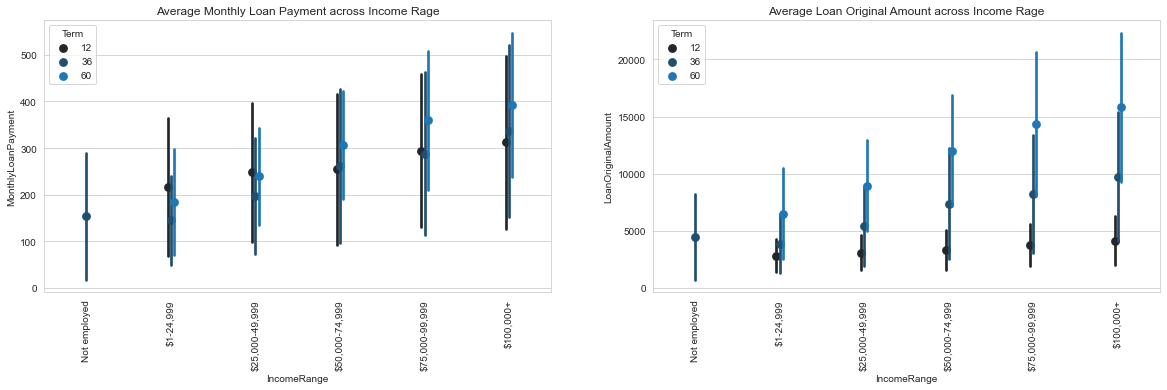

In [63]:
plt.figure(figsize = [20,5])
plt.subplot(1,2,1)
sns.pointplot(data=prosperLoanData, x='IncomeRange', y='MonthlyLoanPayment', hue = 'Term', color=base_color, ci='sd',linestyles = "", dodge = True )
plt.xticks(rotation = 90)
plt.xlabel('IncomeRange')
plt.ylabel('MonthlyLoanPayment')
plt.title('Average Monthly Loan Payment across Income Rage')
plt.subplot(1,2,2)
sns.pointplot(data=prosperLoanData, x='IncomeRange', y='LoanOriginalAmount', hue = 'Term', color=base_color, ci='sd',linestyles = "", dodge = True )
plt.xticks(rotation = 90)
plt.xlabel('IncomeRange')
plt.ylabel('LoanOriginalAmount')
plt.title('Average Loan Original Amount across Income Rage');

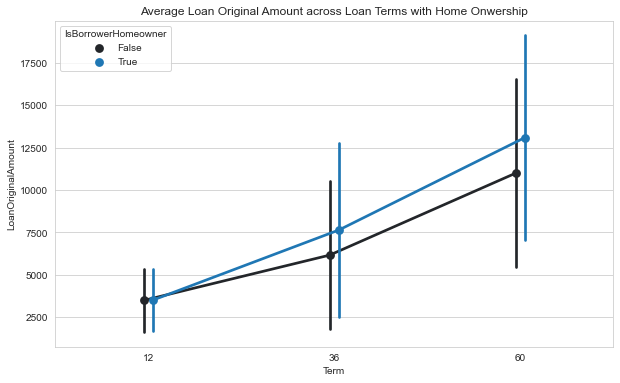

In [64]:
plt.figure(figsize = [10,6])
sns.pointplot(data=prosperLoanData, x='Term', y='LoanOriginalAmount', hue = 'IsBorrowerHomeowner', color=base_color, ci='sd',dodge = True)
plt.xlabel('Term')
plt.ylabel('LoanOriginalAmount')
plt.title('Average Loan Original Amount across Loan Terms with Home Onwership');

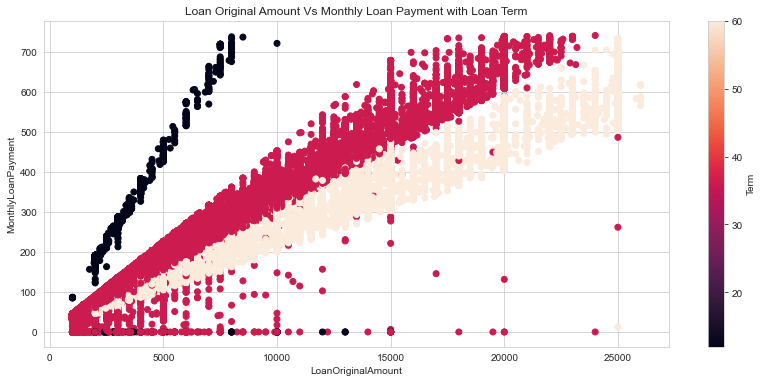

In [65]:
plt.figure(figsize = [14,6])
plt.scatter(data = prosperLoanData, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment',c = 'Term')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('MonthlyLoanPayment')
plt.colorbar(label ='Term')
plt.title('Loan Original Amount Vs Monthly Loan Payment with Loan Term');

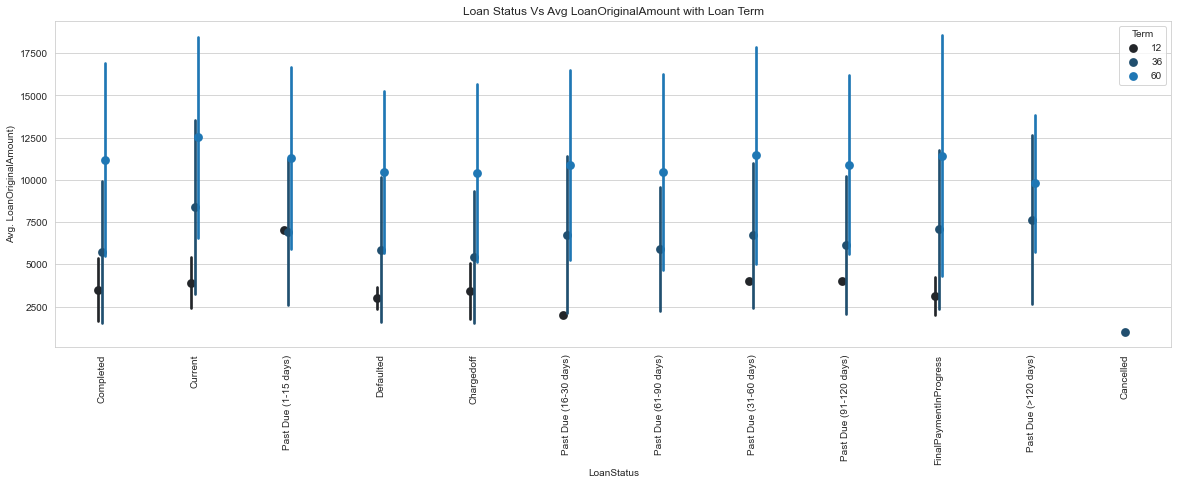

In [66]:
plt.figure(figsize = [20,6])
sns.pointplot(data=prosperLoanData, x='LoanStatus', y='LoanOriginalAmount', hue = 'Term', color=base_color, ci='sd', linestyles = "", dodge = True);
plt.ylabel('Avg. LoanOriginalAmount)')
plt.xticks(rotation = 90)
plt.title('Loan Status Vs Avg LoanOriginalAmount with Loan Term');

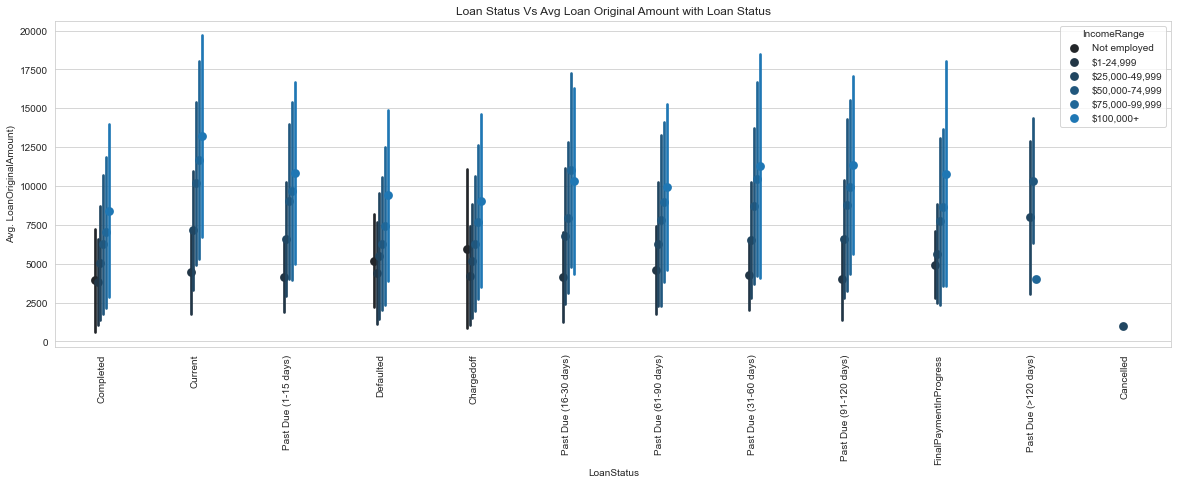

In [67]:
plt.figure(figsize = [20,6])
sns.pointplot(data=prosperLoanData, x='LoanStatus', y='LoanOriginalAmount', hue = 'IncomeRange', color=base_color, ci='sd', linestyles = "", dodge = True);
plt.ylabel('Avg. LoanOriginalAmount)')
plt.xticks(rotation = 90)
plt.title('Loan Status Vs Avg Loan Original Amount with Loan Status');

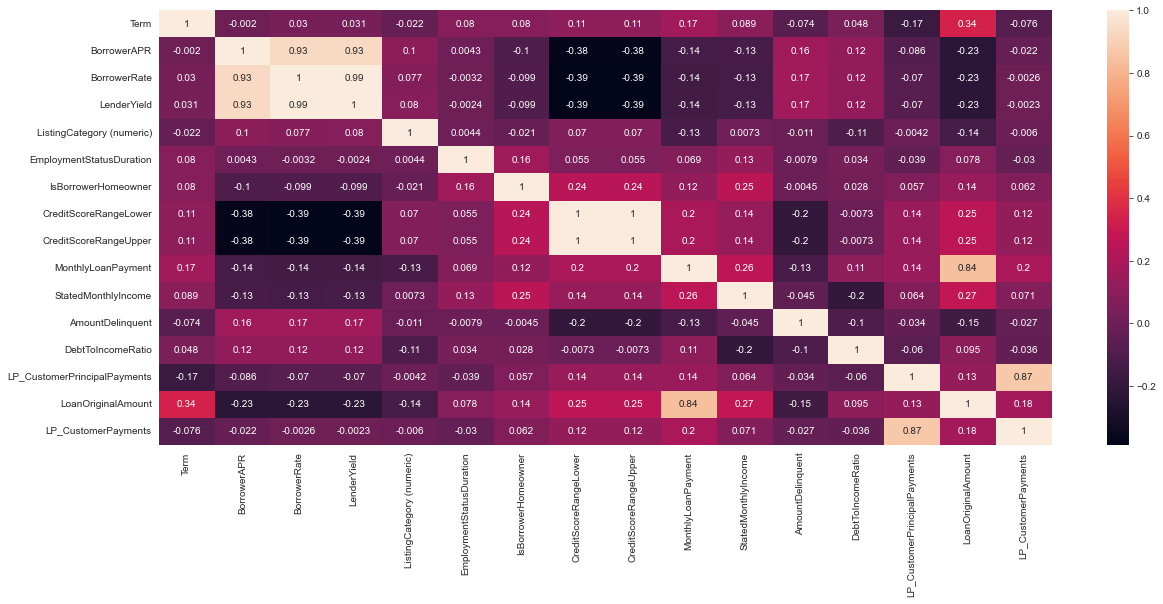

In [68]:
col = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield','ListingCategory (numeric)', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper','MonthlyLoanPayment', 'StatedMonthlyIncome' ,'AmountDelinquent', 'DebtToIncomeRatio', 'LP_CustomerPrincipalPayments', 'LoanOriginalAmount', 'LP_CustomerPayments']

prosperLoanDatacp = prosperLoanData[col]
corrMatrix = prosperLoanDatacp.corr(method = 'kendall')
plt.figure(figsize = (20,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Areas of Discussion

> For short term loans (12months) there is no significant difference between home owners and non home owners on the average loan amount given out, however, this changes for 36 months and the margin increases for 60 months loan term where there is a significant difference with home owners being preferred over non home owners.

> Loans with long repayment terms have low average monthly repayments as compared short term loans which seem to have huge average monthly repayments. Short term loans of 12 months have a steeper graph as compared to 36 months loans whose graph is less steep. 60 months loans have a fairer graph which is less steep of the three repayment terms depicting lower repayment amounts.

> Home owners applying for loans with 36 or 60 months terms are averagely disbursed bigger loans amounts as compared to non home owners. Averagely the home owners get 2000 dollars more as compared to non home owners. For 12 months term the difference is negligible.
For loans with terms 36 and 60 months, the loan size increases as the income increases across the income brackets, however, for loans with 12 months term, the loan size is averagely the same across the different income brackets

> 60 and 36 months loans are the majority of loans being disbursed at Prosper, across the different loan statuses we observe that the two take a bigger percentage with an average of above 5000 dollars. 12 months loans have an average of below 5000 dollars and also are the minority.

> Across all loan statuses, loans size follows the income buckets with the not employed having the smallest average loan size while those who have bigger incomes have bigger loans. This also applies to default rates. Clients with bigger loans have on average bigger default amounts.

> Loan Size is majorly affected by the monthly loan payment with a correlation value of 0.84, other factors that impact loan size are: loan term, StatedMonthlyIncome, CreditSCoreRangeLower and CreditSCoreRangeUpper. The three interest rate variables (BorrowerAPR, BorrowerRate,LenderYield), ListingCatergory and AmountDelinquient negatively impact the loan amount to be disbursed.

## Conclusions

> Prospers targets majorly clients that are employed or in full time employed, majority of their clients have at least an income.

> Home owners have a slight edge against none home owners, for loans with longer repayment terms, home owners get averagely 2000 dollars more than non home owners.

> Its cheaper to take bigger loans with long repayment plan as compared to shorter loans with short repayment plans which are quite expensive because higher interest rates are applied.

> Clients taking bigger loans prefer longer payment plans while smaller loans they prefer short repayment plans.

> Monthly repayment amounts for shorter loans are almost equal bigger loans, this is because shorter loans have to repay bigger amounts to offset the loan while at the same time big loan clients even though have a longer repaint plan, have to make slightly higher amounts due to the huge loan amounts they took.

## Key Insights
> Prospers targets majorly clients that are employed or in full time employed, majority of their clients have at least an income.

> Home owners have a slight edge against none home owners, for loans with longer repayment terms, home owners get averagely 2000 dollars more than non home owners.

> Its cheaper to take bigger loans with long repayment plan as compared to shorter loans with short repayment plans which are quite expensive because higher interest rates are applied.

> Clients taking bigger loans prefer longer payment plans while smaller loans they prefer short repayment plans.